This notebook contains code intended to evaluate the pitch accuracy of a singing performance in comparison to an audio track. It is done by separating the audio track from the accompanied musical instrument and comparing the variation of pitches of the two audio tracks with time.

install python bindings for FFmpeg - with complex filtering support

In [1]:
import ffmpeg

Install Initial modules to be fixed the Spleeter Issues

In [8]:
!pip install --upgrade pip setuptools
!pip install --upgrade cython
!pip install numpy

install python bindings for spleeter - with complex audio separation support

In [9]:
!pip install spleeter

  Using cached spleeter-2.1.0-py3-none-any.whl (50 kB)
  Using cached httpx-0.16.1-py3-none-any.whl (65 kB)
  Using cached librosa-0.8.0.tar.gz (183 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached norbert-0.2.1-py2.py3-none-any.whl (11 kB)
  Using cached numpy-1.18.5.zip (5.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [92 lines of output]
  Running from numpy source directory.
  <string>:461: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
  C:\Users\Ashen Wijesingha\AppData\Local\Temp\pip-install-d9w4aq74\numpy_347672c58d8744529994112e64d0193f\tools\cythonize.py:75: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    required_version = LooseVersion('0.29.14')
  C:\Users\Ashen Wijesingha\AppData\Local\Temp\pip-install-d9w4aq74\numpy_347672c58d8744529994112e64d0193f\tools\cythonize.py:77: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cython_version) < required_version:
  performance hint: _common.pyx:261:19: Exception check will always require the GIL to be acquired. Declare the function as 'noexcept' if 

In [12]:
import os
from spleeter.separator import Separator
import librosa
import numpy as np
import matplotlib.pyplot as plt
import speech_recognition as sr

ModuleNotFoundError: No module named 'spleeter.separator'

Use *spleeter* to separate vocals from the original music file.

In [ ]:
# Path to the Spleeter model. You can change it to the desired model.
spleeter_model = 'spleeter:2stems'

# Initialize the Spleeter separator
separator = Separator(spleeter_model)

# Path to the input audio file (WAV format)
input_audio_file = './audio1.wav'

# Output directory for the separated audio files
output_directory = './separated_recordings'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Perform the separation
audio_data = separator.separate_to_file(input_audio_file, output_directory)

print("Original Audio Separation complete.")

Generate text array Using the audio clip one for lyrics.

In [ ]:
# Initialize the recognizer
recognizer = sr.Recognizer()

# Load the audio file
audio_file = "audio1.wav"

with sr.AudioFile(audio_file) as source:
    # Adjust for ambient noise, if necessary
    recognizer.adjust_for_ambient_noise(source)

    # Record the audio
    audio_data = recognizer.record(source)

# Transcribe the audio to text
text1 = recognizer.recognize_google(audio_data)  # You can use other engines too

print(text1)

convert it into a text array by splitting it into words or sentences using Python's string manipulation functions

In [ ]:
text_array1 = text1.split()  # Split by spaces to get individual words

# Or, split by sentences if needed
sentences1 = text1.split('.')

Separate cover audio from the cover video file.

In [ ]:
input_file = 'video.mp4'
output_file = 'audio2.mp3'

ffmpeg.input(input_file).output(output_file, f='mp3').run()

Use *spleeter* to separate vocals from the cover music file.

In [ ]:
# Path to the Spleeter model. You can change it to the desired model.
spleeter_model = 'spleeter:2stems'

# Initialize the Spleeter separator
separator = Separator(spleeter_model)

# Path to the input audio file (WAV format)
input_audio_file = './audio2.wav'

# Output directory for the separated audio files
output_directory = './separated_recordings'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Perform the separation
audio_data = separator.separate_to_file(input_audio_file, output_directory)

print("Cover Song Audio Separation complete.")

Generate text array Using the audio clip one for lyrics.

In [ ]:
# Initialize the recognizer
recognizer = sr.Recognizer()

# Load the audio file
audio_file = "audio2.wav"

with sr.AudioFile(audio_file) as source:
    # Adjust for ambient noise, if necessary
    recognizer.adjust_for_ambient_noise(source)

    # Record the audio
    audio_data = recognizer.record(source)

# Transcribe the audio to text
text2 = recognizer.recognize_google(audio_data)  # You can use other engines too

print(text2)

convert it into a text array by splitting it into words or sentences using Python's string manipulation functions

In [ ]:
text_array2 = text2.split()  # Split by spaces to get individual words

# Or, split by sentences if needed
sentences2 = text2.split('.')

Extract pitch information from separated audio files using *librosa* python library.

In [3]:
# Paths to the separated audio files (voice and instrument)
original_audio_file = 'separated_recordings/separated_recordings/audio1.wav'
cover_audio_file = 'separated_recordings/separated_recordings/audio2.wav'

# Load the original audio file
y_original_voice, sr_voice = librosa.load(original_audio_file)

# Load the cover audio file
y_cover_voice, sr_instrument = librosa.load(cover_audio_file)

# Extract the pitch information using librosa.piptrack for the voice
f0_original_audio, voiced_flag, voiced_probs = librosa.pyin(y=y_original_voice, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Extract the pitch information using librosa.piptrack for the instrument
f0_cover_audio, voiced_flag, voiced_probs = librosa.pyin(y=y_cover_voice, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

Plot variation of pitches of accompanied music track and singing voice with time.

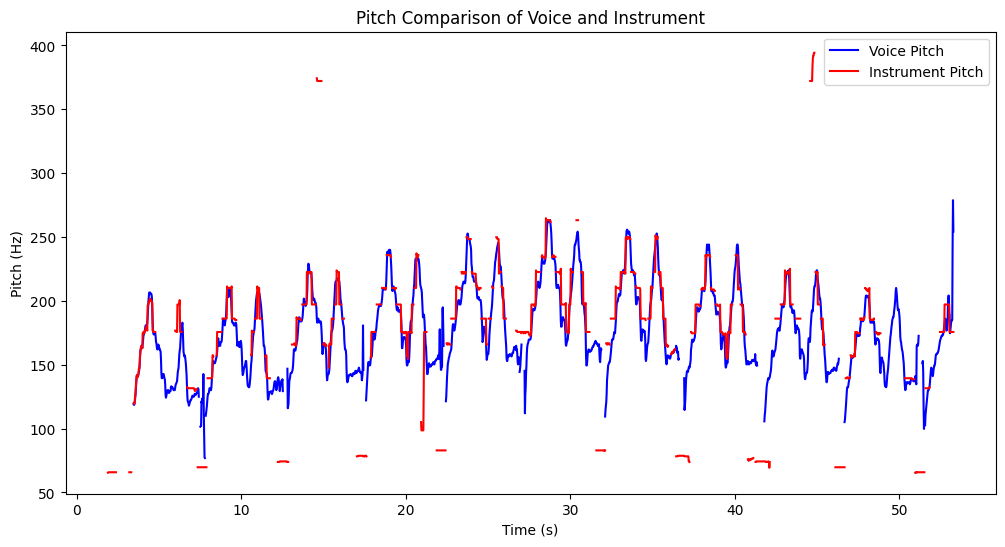

In [10]:
# Create a time vector
times = librosa.times_like(f0_original_audio)

plt.figure(figsize=(12, 6))
plt.plot(times, f0_original_audio, label='Original Audio Pitch', color='blue')
plt.plot(times, f0_cover_audio, label='Cover Audio Pitch', color='red')
plt.title('Pitch Comparison of Original and Cover Song')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend()

plt.show()

Calculate a score for the singing performance based on the variation of the pitch of singing voice and accompanied music track.

No marks will be given if the pitch difference is higher than 100 Hz. **Marks are calculated out of 10**.

In [14]:
# Calculate time step (frame size in seconds)
frame_length = len(f0_original_audio) / len(y_original_voice)

# Initialize variables for scoring
total_marks = 0
max_possible_marks = 0

# Iterate through pitch data and calculate marks
for i in range(len(f0_original_audio)):
    pitch_original_voice = f0_original_audio[i]
    pitch_cover_voice = f0_cover_audio[i]

    if not np.isnan(pitch_original_voice) and not np.isnan(pitch_cover_voice):
        pitch_difference = abs(pitch_original_voice - pitch_cover_voice)

        if pitch_difference < 1.0:
            marks = 10
        elif pitch_difference < 5.0:
            marks = 9
        elif pitch_difference < 10.0:
            marks = 8
        elif pitch_difference < 20.0:
          marks = 7
        elif pitch_difference < 30.0:
            marks = 6
        elif pitch_difference < 40.0:
            marks = 5
        elif pitch_difference < 50.0:
            marks = 4
        elif pitch_difference < 70.0:
            marks = 3
        elif pitch_difference < 80.0:
            marks = 2
        elif pitch_difference < 100.0:
            marks = 1
        else:
            marks = 0
    else:
        marks = 0

    # Update total marks
    total_marks += marks

    # Update the maximum possible marks
    max_possible_marks += 10  # Assuming each second can earn a maximum of 10 marks

# Normalize the final marks to a 0-10 scale
final_marks = (total_marks / max_possible_marks) * 10

# Print the final marks
print(f'Final Marks out of 10: {final_marks:.2f}')

Final Marks out of 10: 4.65
